In [1]:
#Importing all necessary modules
import numpy as np
import sympy as sym
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from numba import jit

In [2]:
#Constants
Tol = 1.0E-8; #Tolerance
mu_S = 1.32712440042E20; #m^3/s^2
mu_day = 2.22972472E-24;
mu_S = mu_S*mu_day; #AU^3/day^2
dv_max = 20; #km/s
dv_max = dv_max/1731.46; #AU/day
dt_departure_1 = 0;
dt_departure_2 = 364;
dt_arrival_1 = 212;
dt_arrival_2 = 760;
Iter_1I_1 = 0;
Iter_1I_2 = 0;
Iter_E_1 = 0;
Iter_E_2 = 0;
print(mu_S)
print(dv_max)

0.00029591220821316525
0.011550945444884664


In [3]:
#Times & Array
t_departure = np.arange(dt_departure_2-dt_departure_1);
t_arrival = np.arange(dt_arrival_2-dt_arrival_1);
dates = np.zeros((dt_arrival_2-dt_arrival_1,dt_departure_2-dt_departure_1));
print(dates)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
#Problem 3
#Initial vectors (AU and AU/day)
r_1I_0 = np.array([3.515868886595499E-2,-3.162046390773074,4.493983111703389]);
v_1I_0 = np.array([-2.317577766980901E-3,9.843360903693031E-3,-1.541856855538041E-2]);
r_E_0 = np.array([-1.796136509111975E-1,9.667949206859814E-1,-3.668681017942158E-5]);
v_E_0 = np.array([-1.720038360888334E-2,-3.211186197806460E-3,7.927736735960840E-7]);
print(r_1I_0)
print(v_1I_0)
print(r_E_0)
print(v_E_0)

[ 0.03515869 -3.16204639  4.49398311]
[-0.00231758  0.00984336 -0.01541857]
[-1.79613651e-01  9.66794921e-01 -3.66868102e-05]
[-1.72003836e-02 -3.21118620e-03  7.92773674e-07]


In [5]:
#Initial Magnitudes (AU and AU/day)
r_1IM_0 = np.sqrt(np.dot(r_1I_0,r_1I_0));
v_1IM_0 = np.sqrt(np.dot(v_1I_0,v_1I_0));
r_EM_0 = np.sqrt(np.dot(r_E_0,r_E_0));
v_EM_0 = np.sqrt(np.dot(v_E_0,v_E_0));
print(r_1IM_0)
print(v_1IM_0)
print(r_EM_0)
print(v_EM_0)

5.495057571953097
0.018438958129008327
0.9833379295053073
0.017497568794498722


In [6]:
#Radial component velocities (AU/day)
nu_r_1I_0 = (np.dot(r_1I_0,v_1I_0))/r_1IM_0;
nu_r_E_0 = (np.dot(r_E_0,v_E_0))/r_EM_0;
print(nu_r_1I_0)
print(nu_r_E_0)

-0.01828869528532203
-1.539128816429416e-05


In [7]:
#Alpha (Semi-major axis reciprocal, 1/AU) and Semi-major axis (AU)
alpha_1I_0 = (2/r_1IM_0) - (v_1IM_0**2 / mu_S);
alpha_E_0 = (2/r_EM_0) - (v_EM_0**2 / mu_S);
print(alpha_1I_0)
print(alpha_E_0)

-0.785009703080843
0.9992410036177539


In [8]:
#Specific angular momentums (AU^2/day)
h_1I_0 = np.cross(r_1I_0,v_1I_0);
h_E_0 = np.cross(r_E_0,v_E_0);
print(h_1I_0)
print(h_E_0)

[ 0.00451833 -0.00987306 -0.00698221]
[6.48641382e-07 7.73420182e-07 1.72060164e-02]


In [9]:
#Specific angular momentum magnitudes (AU^2/day)
h_1IM_0 = np.sqrt(np.dot(h_1I_0,h_1I_0));
h_EM_0 = np.sqrt(np.dot(h_E_0,h_E_0));
print(h_1IM_0)
print(h_EM_0)

0.012909060595588018
0.017206016413271734


In [10]:
#Inclinations (Rad)
i_1I_0 = np.arccos(h_1I_0[2]/h_1IM_0);
i_E_0 = np.arccos(h_E_0[2]/h_EM_0);
print(i_1I_0)
print(i_E_0)

2.1422752865992707
5.866627661176234e-05


In [11]:
#Loop
@jit
def f(t_a,t_d):
    Tol = 1.0E-8; #Tolerance
    mu_S = 1.32712440042E20; #m^3/s^2
    mu_day = 2.22972472E-24;
    mu_S = mu_S*mu_day; #AU^3/day^2
    dv_max = 20; #km/s
    dv_max = dv_max/1731.46; #AU/day
    dt_departure_1 = 0;
    dt_departure_2 = 364;
    dt_arrival_1 = 212;
    dt_arrival_2 = 760;
    Iter_1I_1 = 0;
    Iter_1I_2 = 0;
    Iter_E_1 = 0;
    Iter_E_2 = 0;
    t_departure = np.arange(dt_departure_2-dt_departure_1);
    t_arrival = np.arange(dt_arrival_2-dt_arrival_1);
    dates = np.zeros((dt_arrival_2-dt_arrival_1,dt_departure_2-dt_departure_1));
    r_1I_0 = np.array([3.515868886595499E-2,-3.162046390773074,4.493983111703389]);
    v_1I_0 = np.array([-2.317577766980901E-3,9.843360903693031E-3,-1.541856855538041E-2]);
    r_E_0 = np.array([-1.796136509111975E-1,9.667949206859814E-1,-3.668681017942158E-5]);
    v_E_0 = np.array([-1.720038360888334E-2,-3.211186197806460E-3,7.927736735960840E-7]);
    r_1IM_0 = np.sqrt(np.dot(r_1I_0,r_1I_0));
    v_1IM_0 = np.sqrt(np.dot(v_1I_0,v_1I_0));
    r_EM_0 = np.sqrt(np.dot(r_E_0,r_E_0));
    v_EM_0 = np.sqrt(np.dot(v_E_0,v_E_0));
    nu_r_1I_0 = (np.dot(r_1I_0,v_1I_0))/r_1IM_0;
    nu_r_E_0 = (np.dot(r_E_0,v_E_0))/r_EM_0;
    alpha_1I_0 = (2/r_1IM_0) - (v_1IM_0**2 / mu_S);
    alpha_E_0 = (2/r_EM_0) - (v_EM_0**2 / mu_S);
    h_1I_0 = np.cross(r_1I_0,v_1I_0);
    h_E_0 = np.cross(r_E_0,v_E_0);
    h_1IM_0 = np.sqrt(np.dot(h_1I_0,h_1I_0));
    h_EM_0 = np.sqrt(np.dot(h_E_0,h_E_0));
    i_1I_0 = np.arccos(h_1I_0[2]/h_1IM_0);
    i_E_0 = np.arccos(h_E_0[2]/h_EM_0);
    for i in t_arrival:
        for j in t_departure:
            #Kepler solution/Orbit propagator
            dv = 0;
            dt_1I_1 = t_departure[j];
            dt_E_1 = t_departure[j];
            dt_1I_2 = t_arrival[i] + dt_arrival_1;
            dt_E_2 = t_arrival[i] + dt_arrival_1;
            dt_nogo = t_arrival[i] - t_departure[j] + dt_arrival_1;
            if dt_nogo <= 0:
                dates[i][j] = 0;
                continue
            Chi_1I_1 = np.sqrt(mu_S)*np.abs(alpha_1I_0)*dt_1I_1;
            Chi_E_1 = np.sqrt(mu_S)*np.abs(alpha_E_0)*dt_E_1;
            Chi_1I_2 = np.sqrt(mu_S)*np.abs(alpha_1I_0)*dt_1I_2;
            Chi_E_2 = np.sqrt(mu_S)*np.abs(alpha_E_0)*dt_E_2;
            z_1I_1 = alpha_1I_0*Chi_1I_1**2;
            z_E_1 = alpha_1I_0*Chi_E_1**2;
            z_1I_2 = alpha_1I_0*Chi_1I_2**2;
            z_E_2 = alpha_1I_0*Chi_E_2**2;
            if z_1I_1 > 0:
                C_1I_1 = (1 - np.cos(np.sqrt(z_1I_1)))/z_1I_1;
            if z_1I_1 < 0:
                C_1I_1 = (np.cosh(np.sqrt(-z_1I_1)) - 1)/-z_1I_1;
            if z_1I_1 == 0:
                C_1I_1 = 0.5;
            if z_E_1 > 0:
                C_E_1 = (1 - np.cos(np.sqrt(z_E_1)))/z_E_1;
            if z_E_1 < 0:
                C_E_1 = (np.cosh(np.sqrt(-z_E_1)) - 1)/-z_E_1;
            if z_E_1 == 0:
                C_E_1 = 0.5;
            if z_1I_2 > 0:
                C_1I_2 = (1 - np.cos(np.sqrt(z_1I_2)))/z_1I_2;
            if z_1I_2 < 0:
                C_1I_2 = (np.cosh(np.sqrt(-z_1I_2)) - 1)/-z_1I_2;
            if z_1I_2 == 0:
                C_1I_2 = 0.5;
            if z_E_2 > 0:
                C_E_2 = (1 - np.cos(np.sqrt(z_E_2)))/z_E_2;
            if z_E_2 < 0:
                C_E_2 = (np.cosh(np.sqrt(-z_E_2)) - 1)/-z_E_2;
            if z_E_2 == 0:
                C_E_2 = 0.5;
            if z_1I_1 > 0:
                S_1I_1 = (np.sqrt(z_1I_1) - np.sin(np.sqrt(z_1I_1)))/(np.sqrt(z_1I_1)**3);
            if z_1I_1 < 0:
                S_1I_1 = (np.sinh(np.sqrt(-z_1I_1)) - np.sqrt(-z_1I_1))/(np.sqrt(-z_1I_1)**3);
            if z_1I_1 == 0:
                S_1I_1 = 1/6;
            if z_E_1 > 0:
                S_E_1 = (np.sqrt(z_E_1) - np.sin(np.sqrt(z_E_1)))/(np.sqrt(z_E_1)**3);
            if z_E_1 < 0:
                S_E_1 = (np.sinh(np.sqrt(-z_E_1)) - np.sqrt(-z_E_1))/(np.sqrt(-z_E_1)**3);
            if z_E_1 == 0:
                S_E_1 = 1/6;
            if z_1I_2 > 0:
                S_1I_2 = (np.sqrt(z_1I_2) - np.sin(np.sqrt(z_1I_2)))/(np.sqrt(z_1I_2)**3);
            if z_1I_2 < 0:
                S_1I_2 = (np.sinh(np.sqrt(-z_1I_2)) - np.sqrt(-z_1I_2))/(np.sqrt(-z_1I_2)**3);
            if z_1I_2 == 0:
                S_1I_2 = 1/6;
            if z_E_2 > 0:
                S_E_2 = (np.sqrt(z_E_2) - np.sin(np.sqrt(z_E_2)))/(np.sqrt(z_E_2)**3);
            if z_E_2 < 0:
                S_E_2 = (np.sinh(np.sqrt(-z_E_2)) - np.sqrt(-z_E_2))/(np.sqrt(-z_E_2)**3);
            if z_E_2 == 0:
                S_E_2 = 1/6;
            f_1I_1 = ((r_1IM_0*nu_r_1I_0)/np.sqrt(mu_S))*(Chi_1I_1**2)*(C_1I_1) + (1 - alpha_1I_0*r_1IM_0)*(Chi_1I_1**3)*(S_1I_1) + (r_1IM_0*Chi_1I_1) - np.sqrt(mu_S)*dt_1I_1;
            f_E_1 = ((r_EM_0*nu_r_E_0)/np.sqrt(mu_S))*(Chi_E_1**2)*(C_E_1) + (1 - alpha_E_0*r_EM_0)*(Chi_E_1**3)*(S_E_1) + (r_EM_0*Chi_E_1) - np.sqrt(mu_S)*dt_E_1;
            f_1I_2 = ((r_1IM_0*nu_r_1I_0)/np.sqrt(mu_S))*(Chi_1I_2**2)*(C_1I_2) + (1 - alpha_1I_0*r_1IM_0)*(Chi_1I_2**3)*(S_1I_2) + (r_1IM_0*Chi_1I_2) - np.sqrt(mu_S)*dt_1I_2;
            f_E_2 = ((r_EM_0*nu_r_E_0)/np.sqrt(mu_S))*(Chi_E_2**2)*(C_E_2) + (1 - alpha_E_0*r_EM_0)*(Chi_E_2**3)*(S_E_2) + (r_EM_0*Chi_E_2) - np.sqrt(mu_S)*dt_E_2;
            fprime_1I_1 = ((r_1IM_0*nu_r_1I_0)/np.sqrt(mu_S))*Chi_1I_1*(1 - alpha_1I_0*(Chi_1I_1**2)*S_1I_1) + (1 - alpha_1I_0*r_1IM_0)*(Chi_1I_1**2)*C_1I_1 + r_1IM_0;
            fprime_E_1 = ((r_EM_0*nu_r_E_0)/np.sqrt(mu_S))*Chi_E_1*(1 - alpha_E_0*(Chi_E_1**2)*S_E_1) + (1 - alpha_E_0*r_EM_0)*(Chi_E_1**2)*C_E_1 + r_EM_0;
            fprime_1I_2 = ((r_1IM_0*nu_r_1I_0)/np.sqrt(mu_S))*Chi_1I_2*(1 - alpha_1I_0*(Chi_1I_2**2)*S_1I_2) + (1 - alpha_1I_0*r_1IM_0)*(Chi_1I_2**2)*C_1I_2 + r_1IM_0;
            fprime_E_2 = ((r_EM_0*nu_r_E_0)/np.sqrt(mu_S))*Chi_E_2*(1 - alpha_E_0*(Chi_E_2**2)*S_E_2) + (1 - alpha_E_0*r_EM_0)*(Chi_E_2**2)*C_E_2 + r_EM_0;
            Ratio_1I_1 = f_1I_1/fprime_1I_1;
            Ratio_E_1 = f_E_1/fprime_E_1;
            Ratio_1I_2 = f_1I_2/fprime_1I_2;
            Ratio_E_2 = f_E_2/fprime_E_2;
            while np.abs(Ratio_1I_1) >= Tol:
                Chi_i_1I_1 = Chi_1I_1 - Ratio_1I_1;
                z_1I_1 = alpha_1I_0*Chi_i_1I_1**2;
                if z_1I_1 > 0:
                    C_1I_1 = (1 - np.cos(np.sqrt(z_1I_1)))/z_1I_1;
                if z_1I_1 < 0:
                    C_1I_1 = (np.cosh(np.sqrt(-z_1I_1)) - 1)/-z_1I_1;
                if z_1I_1 == 0:
                    C_1I_1 = 0.5;
                if z_1I_1 > 0:
                    S_1I_1 = (np.sqrt(z_1I_1) - np.sin(np.sqrt(z_1I_1)))/(np.sqrt(z_1I_1)**3);
                if z_1I_1 < 0:
                    S_1I_1 = (np.sinh(np.sqrt(-z_1I_1)) - np.sqrt(-z_1I_1))/(np.sqrt(-z_1I_1)**3);
                if z_1I_1 == 0:
                    S_1I_1 = 1/6;
                f_1I_1 = ((r_1IM_0*nu_r_1I_0)/np.sqrt(mu_S))*(Chi_i_1I_1**2)*(C_1I_1) + (1 - alpha_1I_0*r_1IM_0)*(Chi_i_1I_1**3)*(S_1I_1) + (r_1IM_0*Chi_i_1I_1) - np.sqrt(mu_S)*dt_1I_1;
                fprime_1I_1 = ((r_1IM_0*nu_r_1I_0)/np.sqrt(mu_S))*Chi_i_1I_1*(1 - alpha_1I_0*(Chi_i_1I_1**2)*S_1I_1) + (1 - alpha_1I_0*r_1IM_0)*(Chi_i_1I_1**2)*C_1I_1 + r_1IM_0;
                Ratio_1I_1 = f_1I_1/fprime_1I_1;
                Chi_1I_1 = Chi_i_1I_1;
            while np.abs(Ratio_E_1) >= Tol:
                Chi_i_E_1 = Chi_E_1 - Ratio_E_1;
                z_E_1 = alpha_E_0*Chi_i_E_1**2;
                if z_E_1 > 0:
                    C_E_1 = (1 - np.cos(np.sqrt(z_E_1)))/z_E_1;
                if z_E_1 < 0:
                    C_E_1 = (np.cosh(np.sqrt(-z_E_1)) - 1)/-z_E_1;
                if z_E_1 == 0:
                    C_E_1 = 0.5;
                if z_E_1 > 0:
                    S_E_1 = (np.sqrt(z_E_1) - np.sin(np.sqrt(z_E_1)))/(np.sqrt(z_E_1)**3);
                if z_E_1 < 0:
                    S_E_1 = (np.sinh(np.sqrt(-z_E_1)) - np.sqrt(-z_E_1))/(np.sqrt(-z_E_1)**3);
                if z_E_1 == 0:
                    S_E_1 = 1/6;
                f_E_1 = ((r_EM_0*nu_r_E_0)/np.sqrt(mu_S))*(Chi_i_E_1**2)*(C_E_1) + (1 - alpha_E_0*r_EM_0)*(Chi_i_E_1**3)*(S_E_1) + (r_EM_0*Chi_i_E_1) - np.sqrt(mu_S)*dt_E_1;
                fprime_E_1 = ((r_EM_0*nu_r_E_0)/np.sqrt(mu_S))*Chi_i_E_1*(1 - alpha_E_0*(Chi_i_E_1**2)*S_E_1) + (1 - alpha_E_0*r_EM_0)*(Chi_i_E_1**2)*C_E_1 + r_EM_0;
                Ratio_E_1 = f_E_1/fprime_E_1;
                Chi_E_1 = Chi_i_E_1;
            while np.abs(Ratio_1I_2) >= Tol:
                Chi_i_1I_2 = Chi_1I_2 - Ratio_1I_2;
                z_1I_2 = alpha_1I_0*Chi_i_1I_2**2;
                if z_1I_2 > 0:
                    C_1I_2 = (1 - np.cos(np.sqrt(z_1I_2)))/z_1I_2;
                if z_1I_2 < 0:
                    C_1I_2 = (np.cosh(np.sqrt(-z_1I_2)) - 1)/-z_1I_2;
                if z_1I_2 == 0:
                    C_1I_2 = 0.5;
                if z_1I_2 > 0:
                    S_1I_2 = (np.sqrt(z_1I_2) - np.sin(np.sqrt(z_1I_2)))/(np.sqrt(z_1I_2)**3);
                if z_1I_2 < 0:
                    S_1I_2 = (np.sinh(np.sqrt(-z_1I_2)) - np.sqrt(-z_1I_2))/(np.sqrt(-z_1I_2)**3);
                if z_1I_2 == 0:
                    S_1I_2 = 1/6;
                f_1I_2 = ((r_1IM_0*nu_r_1I_0)/np.sqrt(mu_S))*(Chi_i_1I_2**2)*(C_1I_2) + (1 - alpha_1I_0*r_1IM_0)*(Chi_i_1I_2**3)*(S_1I_2) + (r_1IM_0*Chi_i_1I_2) - np.sqrt(mu_S)*dt_1I_2;
                fprime_1I_2 = ((r_1IM_0*nu_r_1I_0)/np.sqrt(mu_S))*Chi_i_1I_2*(1 - alpha_1I_0*(Chi_i_1I_2**2)*S_1I_2) + (1 - alpha_1I_0*r_1IM_0)*(Chi_i_1I_2**2)*C_1I_2 + r_1IM_0;
                Ratio_1I_2 = f_1I_2/fprime_1I_2;
                Chi_1I_2 = Chi_i_1I_2;
            while np.abs(Ratio_E_2) >= Tol:
                Chi_i_E_2 = Chi_E_2 - Ratio_E_2;
                z_E_2 = alpha_E_0*Chi_i_E_2**2;
                if z_E_2 > 0:
                    C_E_2 = (1 - np.cos(np.sqrt(z_E_2)))/z_E_2;
                if z_E_2 < 0:
                    C_E_2 = (np.cosh(np.sqrt(-z_E_2)) - 1)/-z_E_2;
                if z_E_2 == 0:
                    C_E_2 = 0.5;
                if z_E_2 > 0:
                    S_E_2 = (np.sqrt(z_E_2) - np.sin(np.sqrt(z_E_2)))/(np.sqrt(z_E_2)**3);
                if z_E_2 < 0:
                    S_E_2 = (np.sinh(np.sqrt(-z_E_2)) - np.sqrt(-z_E_2))/(np.sqrt(-z_E_2)**3);
                if z_E_2 == 0:
                    S_E_2 = 1/6;
                f_E_2 = ((r_EM_0*nu_r_E_0)/np.sqrt(mu_S))*(Chi_i_E_2**2)*(C_E_2) + (1 - alpha_E_0*r_EM_0)*(Chi_i_E_2**3)*(S_E_2) + (r_EM_0*Chi_i_E_2) - np.sqrt(mu_S)*dt_E_2;
                fprime_E_2 = ((r_EM_0*nu_r_E_0)/np.sqrt(mu_S))*Chi_i_E_2*(1 - alpha_E_0*(Chi_i_E_2**2)*S_E_2) + (1 - alpha_E_0*r_EM_0)*(Chi_i_E_2**2)*C_E_2 + r_EM_0;
                Ratio_E_2 = f_E_2/fprime_E_2;
                Chi_E_2 = Chi_i_E_2;
            f_func_1I_1 = 1 - ((Chi_1I_1**2)/r_1IM_0)*C_1I_1;
            f_func_1I_2 = 1 - ((Chi_1I_2**2)/r_1IM_0)*C_1I_2;
            f_func_E_1 = 1 - ((Chi_E_1**2)/r_EM_0)*C_E_1;
            f_func_E_2 = 1 - ((Chi_E_2**2)/r_EM_0)*C_E_2;
            g_func_1I_1 = dt_1I_1 - (1/np.sqrt(mu_S))*(Chi_1I_1**3)*S_1I_1;
            g_func_1I_2 = dt_1I_2 - (1/np.sqrt(mu_S))*(Chi_1I_2**3)*S_1I_2;
            g_func_E_1 = dt_E_1 - (1/np.sqrt(mu_S))*(Chi_E_1**3)*S_E_1;
            g_func_E_2 = dt_E_2 - (1/np.sqrt(mu_S))*(Chi_E_2**3)*S_E_2;
            r_1I_1 = f_func_1I_1*r_1I_0 + g_func_1I_1*v_1I_0;
            r_1I_2 = f_func_1I_2*r_1I_0 + g_func_1I_2*v_1I_0;
            r_E_1 = f_func_E_1*r_E_0 + g_func_E_1*v_E_0;
            r_E_2 = f_func_E_2*r_E_0 + g_func_E_2*v_E_0;
            r_1IM_1 = np.sqrt(np.dot(r_1I_1,r_1I_1));
            r_1IM_2 = np.sqrt(np.dot(r_1I_2,r_1I_2));
            r_EM_1 = np.sqrt(np.dot(r_E_1,r_E_1));
            r_EM_2 = np.sqrt(np.dot(r_E_2,r_E_2));
            fdot_1I_1 = (np.sqrt(mu_S)/(r_1IM_0*r_1IM_1))*(alpha_1I_0*(Chi_1I_1**3)*S_1I_1 - Chi_1I_1);
            fdot_1I_2 = (np.sqrt(mu_S)/(r_1IM_0*r_1IM_2))*(alpha_1I_0*(Chi_1I_2**3)*S_1I_2 - Chi_1I_2);
            fdot_E_1 = (np.sqrt(mu_S)/(r_EM_0*r_EM_1))*(alpha_E_0*(Chi_E_1**3)*S_E_1 - Chi_E_1);
            fdot_E_2 = (np.sqrt(mu_S)/(r_EM_0*r_EM_2))*(alpha_E_0*(Chi_E_2**3)*S_E_2 - Chi_E_2);
            gdot_1I_1 = 1 - ((Chi_1I_1**2)/r_1IM_1)*C_1I_1;
            gdot_1I_2 = 1 - ((Chi_1I_2**2)/r_1IM_2)*C_1I_2;
            gdot_E_1 = 1 - ((Chi_E_1**2)/r_EM_1)*C_E_1;
            gdot_E_2 = 1 - ((Chi_E_2**2)/r_EM_2)*C_E_2;
            v_1I_1 = fdot_1I_1*r_1I_0 + gdot_1I_1*v_1I_0;
            v_1I_2 = fdot_1I_2*r_1I_0 + gdot_1I_2*v_1I_0;
            v_E_1 = fdot_E_1*r_E_0 + gdot_E_1*v_E_0;
            v_E_2 = fdot_E_2*r_E_0 + gdot_E_2*v_E_0;
            v_1IM_1 = np.sqrt(np.dot(v_1I_1,v_1I_1));
            v_1IM_2 = np.sqrt(np.dot(v_1I_2,v_1I_2));
            v_EM_1 = np.sqrt(np.dot(v_E_1,v_E_1));
            v_EM_2 = np.sqrt(np.dot(v_E_2,v_E_2));
            #Lambert solver
            r1r2_cross_1I_1 = np.cross(r_1I_0,r_1I_1);
            r1r2_cross_1I_2 = np.cross(r_1I_0,r_1I_2);
            r1r2_cross_E_1 = np.cross(r_E_0,r_E_1);
            r1r2_cross_E_2 = np.cross(r_E_0,r_E_2);
            r1r2_dot_1I_1 = np.dot(r_1I_0,r_1I_1);
            r1r2_dot_1I_2 = np.dot(r_1I_0,r_1I_2);
            r1r2_dot_E_1 = np.dot(r_E_0,r_E_1);
            r1r2_dot_E_2 = np.dot(r_E_0,r_E_2);
            r1r2_1IM_1 = r_1IM_0*r_1IM_1;
            r1r2_1IM_2 = r_1IM_0*r_1IM_2;
            r1r2_EM_1 = r_EM_0*r_EM_1;
            r1r2_EM_2 = r_EM_0*r_EM_2;
            dtheta_1I_1_in = r1r2_dot_1I_1/r1r2_1IM_1;
            dtheta_1I_2_in = r1r2_dot_1I_2/r1r2_1IM_2;
            dtheta_E_1_in = r1r2_dot_E_1/r1r2_EM_1;
            dtheta_E_2_in = r1r2_dot_E_2/r1r2_EM_2;
            if dtheta_1I_1_in >= 1:
                dtheta_1I_1_in = 0.99;
            if dtheta_1I_1_in <= -1:
                dtheta_1I_1_in = -0.99;
            if dtheta_1I_2_in >= 1:
                dtheta_1I_2_in = 0.99;
            if dtheta_1I_2_in <= -1:
                dtheta_1I_2_in = -0.99;
            if dtheta_E_1_in >= 1:
                dtheta_E_1_in = 0.99;
            if dtheta_E_1_in <= -1:
                dtheta_E_1_in = -0.99;
            if dtheta_E_2_in >= 1:
                dtheta_E_2_in = 0.99;
            if dtheta_E_2_in <= -1:
                dtheta_E_2_in = -0.99;
            if i_1I_0 <= np.pi/2:
                if r1r2_cross_1I_1[2] >= 0:
                    dtheta_1I_1 = np.arccos(dtheta_1I_1_in);
                else:
                    dtheta_1I_1 = 2*np.pi - np.arccos(dtheta_1I_1_in);
                if r1r2_cross_1I_2[2] >= 0:
                    dtheta_1I_2 = np.arccos(dtheta_1I_2_in);
                else:
                    dtheta_1I_2 = 2*np.pi - np.arccos(dtheta_1I_2_in);
            else:
                if r1r2_cross_1I_1[2] < 0:
                    dtheta_1I_1 = np.arccos(dtheta_1I_1_in);
                else:
                    dtheta_1I_1 = 2*np.pi - np.arccos(dtheta_1I_1_in);
                if r1r2_cross_1I_2[2] < 0:
                    dtheta_1I_2 = np.arccos(dtheta_1I_2_in);
                else:
                    dtheta_1I_2 = 2*np.pi - np.arccos(dtheta_1I_2_in);
            if i_E_0 <= np.pi/2:
                if r1r2_cross_E_1[2] >= 0:
                    dtheta_E_1 = np.arccos(dtheta_E_1_in);
                else:
                    dtheta_E_1 = 2*np.pi - np.arccos(dtheta_E_1_in);
                if r1r2_cross_E_2[2] >= 0:
                    dtheta_E_2 = np.arccos(dtheta_E_2_in);
                else:
                    dtheta_E_2 = 2*np.pi - np.arccos(dtheta_E_2_in);
            else:
                if r1r2_cross_E_1[2] < 0:
                    dtheta_E_1 = np.arccos(dtheta_E_1_in);
                else:
                    dtheta_E_1 = 2*np.pi - np.arccos(dtheta_E_1_in);
                if r1r2_cross_E_2[2] < 0:
                    dtheta_E_2 = np.arccos(dtheta_E_2_in);
                else:
                    dtheta_E_2 = 2*np.pi - np.arccos(dtheta_E_2_in);
            A_1I_1 = np.sin(dtheta_1I_1)*np.sqrt((r1r2_1IM_1)/(1 - np.cos(dtheta_1I_1)));
            A_1I_2 = np.sin(dtheta_1I_2)*np.sqrt((r1r2_1IM_2)/(1 - np.cos(dtheta_1I_2)));
            A_E_1 = np.sin(dtheta_E_1)*np.sqrt((r1r2_EM_1)/(1 - np.cos(dtheta_E_1)));
            A_E_2 = np.sin(dtheta_E_2)*np.sqrt((r1r2_EM_2)/(1 - np.cos(dtheta_E_2)));
            z_1I_1 = 0;
            z_1I_2 = 0;
            z_E_1 = 0;
            z_E_2 = 0;
            if z_1I_1 > 0:
                C_1I_1 = (1 - np.cos(np.sqrt(z_1I_1)))/z_1I_1;
            if z_1I_1 < 0:
                C_1I_1 = (np.cosh(np.sqrt(-z_1I_1)) - 1)/-z_1I_1;
            if z_1I_1 == 0:
                C_1I_1 = 0.5;
            if z_1I_2 > 0:
                C_1I_2 = (1 - np.cos(np.sqrt(z_1I_2)))/z_1I_2;
            if z_1I_2 < 0:
                C_1I_2 = (np.cosh(np.sqrt(-z_1I_2)) - 1)/-z_1I_2;
            if z_1I_2 == 0:
                C_1I_2 = 0.5;
            if z_E_1 > 0:
                C_E_1 = (1 - np.cos(np.sqrt(z_E_1)))/z_E_1;
            if z_E_1 < 0:
                C_E_1 = (np.cosh(np.sqrt(-z_E_1)) - 1)/-z_E_1;
            if z_E_1 == 0:
                C_E_1 = 0.5;
            if z_E_2 > 0:
                C_E_2 = (1 - np.cos(np.sqrt(z_E_2)))/z_E_2;
            if z_E_2 < 0:
                C_E_2 = (np.cosh(np.sqrt(-z_E_2)) - 1)/-z_E_2;
            if z_E_2 == 0:
                C_E_2 = 0.5;
            if z_1I_1 > 0:
                S_1I_1 = (np.sqrt(z_1I_1) - np.sin(np.sqrt(z_1I_1)))/(np.sqrt(z_1I_1)**3);
            if z_1I_1 < 0:
                S_1I_1 = (np.sinh(np.sqrt(-z_1I_1)) - np.sqrt(-z_1I_1))/(np.sqrt(-z_1I_1)**3);
            if z_1I_1 == 0:
                S_1I_1 = 1/6;
            if z_1I_2 > 0:
                S_1I_2 = (np.sqrt(z_1I_2) - np.sin(np.sqrt(z_1I_2)))/(np.sqrt(z_1I_2)**3);
            if z_1I_2 < 0:
                S_1I_2 = (np.sinh(np.sqrt(-z_1I_2)) - np.sqrt(-z_1I_2))/(np.sqrt(-z_1I_2)**3);
            if z_1I_2 == 0:
                S_1I_2 = 1/6;
            if z_E_1 > 0:
                S_E_1 = (np.sqrt(z_E_1) - np.sin(np.sqrt(z_E_1)))/(np.sqrt(z_E_1)**3);
            if z_E_1 < 0:
                S_E_1 = (np.sinh(np.sqrt(-z_E_1)) - np.sqrt(-z_E_1))/(np.sqrt(-z_E_1)**3);
            if z_E_1 == 0:
                S_E_1 = 1/6;
            if z_E_2 > 0:
                S_E_2 = (np.sqrt(z_E_2) - np.sin(np.sqrt(z_E_2)))/(np.sqrt(z_E_2)**3);
            if z_E_2 < 0:
                S_E_2 = (np.sinh(np.sqrt(-z_E_2)) - np.sqrt(-z_E_2))/(np.sqrt(-z_E_2)**3);
            if z_E_2 == 0:
                S_E_2 = 1/6;
            y_1I_1 = r_1IM_0 + r_1IM_1 + A_1I_1*((z_1I_1*S_1I_1 - 1)/np.sqrt(C_1I_1));
            y_1I_2 = r_1IM_0 + r_1IM_2 + A_1I_2*((z_1I_2*S_1I_2 - 1)/np.sqrt(C_1I_2));
            y_E_1 = r_EM_0 + r_EM_1 + A_E_1*((z_E_1*S_E_1 - 1)/np.sqrt(C_E_1));
            y_E_2 = r_EM_0 + r_EM_2 + A_E_2*((z_E_2*S_E_2 - 1)/np.sqrt(C_E_2));
            if y_1I_1 <= Tol:
                y_1I_1 = Tol;
            if y_1I_2 <= Tol:
                y_1I_2 = Tol;
            if y_E_1 <= Tol:
                y_E_1 = Tol;
            if y_E_2 <= Tol:
                y_E_2 = Tol;
            F_1I_1 = ((y_1I_1/C_1I_1)**1.5)*S_1I_1 + A_1I_1*np.sqrt(y_1I_1) - np.sqrt(mu_S)*dt_1I_1;
            F_1I_2 = ((y_1I_2/C_1I_2)**1.5)*S_1I_2 + A_1I_2*np.sqrt(y_1I_2) - np.sqrt(mu_S)*dt_1I_2;
            F_E_1 = ((y_E_1/C_E_1)**1.5)*S_E_1 + A_E_1*np.sqrt(y_E_1) - np.sqrt(mu_S)*dt_E_1;
            F_E_2 = ((y_E_2/C_E_2)**1.5)*S_E_2 + A_E_2*np.sqrt(y_E_2) - np.sqrt(mu_S)*dt_E_2;
            if z_1I_1 != 0:
                Fprime_1I_1 = ((y_1I_1/C_1I_1)**1.5)*((1/(2*z_1I_1))*(C_1I_1 - 1.5*(S_1I_1/C_1I_1)) + 0.75*((S_1I_1**2)/C_1I_1)) + (A_1I_1/8)*(3*(S_1I_1/C_1I_1)*np.sqrt(y_1I_1) + A_1I_1*np.sqrt(C_1I_1/y_1I_1));
            else:
                Fprime_1I_1 = (np.sqrt(2)/40)*y_1I_1 + (A_1I_1/8)*(np.sqrt(y_1I_1) + A_1I_1*np.sqrt(1/(2*y_1I_1)));
            if z_1I_2 != 0:
                Fprime_1I_2 = ((y_1I_2/C_1I_2)**1.5)*((1/(2*z_1I_2))*(C_1I_2 - 1.5*(S_1I_2/C_1I_2)) + 0.75*((S_1I_2**2)/C_1I_2)) + (A_1I_2/8)*(3*(S_1I_2/C_1I_2)*np.sqrt(y_1I_2) + A_1I_2*np.sqrt(C_1I_2/y_1I_2));
            else:
                Fprime_1I_2 = (np.sqrt(2)/40)*y_1I_2 + (A_1I_2/8)*(np.sqrt(y_1I_2) + A_1I_2*np.sqrt(1/(2*y_1I_2)));
            if z_E_1 != 0:
                Fprime_E_1 = ((y_E_1/C_E_1)**1.5)*((1/(2*z_E_1))*(C_E_1 - 1.5*(S_E_1/C_E_1)) + 0.75*((S_E_1**2)/C_E_1)) + (A_E_1/8)*(3*(S_E_1/C_E_1)*np.sqrt(y_E_1) + A_E_1*np.sqrt(C_E_1/y_E_1));
            else:
                Fprime_E_1 = (np.sqrt(2)/40)*y_E_1 + (A_E_1/8)*(np.sqrt(y_E_1) + A_E_1*np.sqrt(1/(2*y_E_1)));
            if z_E_2 != 0:
                Fprime_E_2 = ((y_E_2/C_E_2)**1.5)*((1/(2*z_E_2))*(C_E_2 - 1.5*(S_E_2/C_E_2)) + 0.75*((S_E_2**2)/C_E_2)) + (A_E_2/8)*(3*(S_E_2/C_E_2)*np.sqrt(y_E_2) + A_E_2*np.sqrt(C_E_2/y_E_2));
            else:
                Fprime_E_2 = (np.sqrt(2)/40)*y_E_2 + (A_E_2/8)*(np.sqrt(y_E_2) + A_E_2*np.sqrt(1/(2*y_E_2)));
            Ratio_1I_1 = F_1I_1/Fprime_1I_1;
            Ratio_1I_2 = F_1I_2/Fprime_1I_2;
            Ratio_E_1 = F_E_1/Fprime_E_1;
            Ratio_E_2 = F_E_2/Fprime_E_2;
            while np.abs(Ratio_1I_1) >= Tol:
                z_i_1I_1 = z_1I_1 - Ratio_1I_1;
                if z_i_1I_1 > 0:
                    C_i_1I_1 = (1 - np.cos(np.sqrt(z_i_1I_1)))/z_i_1I_1;
                if z_i_1I_1 < 0:
                    C_i_1I_1 = (np.cosh(np.sqrt(-z_i_1I_1)) - 1)/-z_i_1I_1;
                if z_i_1I_1 == 0:
                    C_i_1I_1 = 0.5;
                if z_i_1I_1 > 0:
                    S_i_1I_1 = (np.sqrt(z_i_1I_1) - np.sin(np.sqrt(z_i_1I_1)))/(np.sqrt(z_i_1I_1)**3);
                if z_i_1I_1 < 0:
                    S_i_1I_1 = (np.sinh(np.sqrt(-z_i_1I_1)) - np.sqrt(-z_i_1I_1))/(np.sqrt(-z_i_1I_1)**3);
                if z_i_1I_1 == 0:
                    S_i_1I_1 = 1/6;
                y_i_1I_1 = r_1IM_0 + r_1IM_1 + A_1I_1*((z_i_1I_1*S_i_1I_1 - 1)/np.sqrt(C_i_1I_1));
                if y_i_1I_1 <= 0:
                    z_1I_1 = z_1I_1;
                    C_1I_1 = C_1I_1;
                    S_1I_1 = S_1I_1;
                    y_1I_1 = y_1I_1;
                    F_1I_1 = F_1I_1;
                    Fprime_1I_1 = Fprime_1I_1;
                    Ratio_1I_1 = Ratio_1I_1;
                    break
                if y_i_1I_1 >= 1.0E16:
                    z_1I_1 = z_1I_1;
                    C_1I_1 = C_1I_1;
                    S_1I_1 = S_1I_1;
                    y_1I_1 = y_1I_1;
                    F_1I_1 = F_1I_1;
                    Fprime_1I_1 = Fprime_1I_1;
                    Ratio_1I_1 = Ratio_1I_1;
                    break
                F_i_1I_1 = ((y_i_1I_1/C_i_1I_1)**1.5)*S_i_1I_1 + A_1I_1*np.sqrt(y_i_1I_1) - np.sqrt(mu_S)*dt_1I_1;
                if z_i_1I_1 != 0:
                    Fprime_i_1I_1 = ((y_i_1I_1/C_i_1I_1)**1.5)*((1/(2*z_i_1I_1))*(C_i_1I_1 - 1.5*(S_i_1I_1/C_i_1I_1)) + 0.75*((S_i_1I_1**2)/C_i_1I_1)) + (A_1I_1/8)*(3*(S_i_1I_1/C_i_1I_1)*np.sqrt(y_i_1I_1) + A_1I_1*np.sqrt(C_i_1I_1/y_i_1I_1));
                else:
                    Fprime_i_1I_1 = (np.sqrt(2)/40)*y_i_1I_1 + (A_1I_1/8)*(np.sqrt(y_i_1I_1) + A_1I_1*np.sqrt(1/(2*y_i_1I_1)));
                Ratio_1I_1 = F_i_1I_1/Fprime_i_1I_1;
                z_1I_1 = z_i_1I_1;
                C_1I_1 = C_i_1I_1;
                S_1I_1 = S_i_1I_1;
                y_1I_1 = y_i_1I_1;
                F_1I_1 = F_i_1I_1;
                Fprime_1I_1 = Fprime_i_1I_1;
                Ratio_1I_1 = Ratio_1I_1;
                Iter_1I_1 += 1;
                if Iter_1I_1 >= 100:
                    z_1I_1 = z_1I_1;
                    C_1I_1 = C_1I_1;
                    S_1I_1 = S_1I_1;
                    y_1I_1 = y_1I_1;
                    F_1I_1 = F_1I_1;
                    Fprime_1I_1 = Fprime_1I_1;
                    Ratio_1I_1 = Ratio_1I_1;
                    break
            while np.abs(Ratio_1I_2) >= Tol:
                z_i_1I_2 = z_1I_2 - Ratio_1I_2;
                if z_i_1I_2 > 0:
                    C_i_1I_2 = (1 - np.cos(np.sqrt(z_i_1I_2)))/z_i_1I_2;
                if z_i_1I_2 < 0:
                    C_i_1I_2 = (np.cosh(np.sqrt(-z_i_1I_2)) - 1)/-z_i_1I_2;
                if z_i_1I_2 == 0:
                    C_i_1I_2 = 0.5;
                if z_i_1I_2 > 0:
                    S_i_1I_2 = (np.sqrt(z_i_1I_2) - np.sin(np.sqrt(z_i_1I_2)))/(np.sqrt(z_i_1I_2)**3);
                if z_i_1I_2 < 0:
                    S_i_1I_2 = (np.sinh(np.sqrt(-z_i_1I_2)) - np.sqrt(-z_i_1I_2))/(np.sqrt(-z_i_1I_2)**3);
                if z_i_1I_2 == 0:
                    S_i_1I_2 = 1/6;
                y_i_1I_2 = r_1IM_0 + r_1IM_2 + A_1I_2*((z_i_1I_2*S_i_1I_2 - 1)/np.sqrt(C_i_1I_2));
                if y_i_1I_2 <= 0:
                    z_1I_2 = z_1I_2;
                    C_1I_2 = C_1I_2;
                    S_1I_2 = S_1I_2;
                    y_1I_2 = y_1I_2;
                    F_1I_2 = F_1I_2;
                    Fprime_1I_2 = Fprime_1I_2;
                    Ratio_1I_2 = Ratio_1I_2;
                    break
                if y_i_1I_2 >= 1.0E16:
                    z_1I_2 = z_1I_2;
                    C_1I_2 = C_1I_2;
                    S_1I_2 = S_1I_2;
                    y_1I_2 = y_1I_2;
                    F_1I_2 = F_1I_2;
                    Fprime_1I_2 = Fprime_1I_2;
                    Ratio_1I_2 = Ratio_1I_2;
                    break
                F_i_1I_2 = ((y_i_1I_2/C_i_1I_2)**1.5)*S_i_1I_2 + A_1I_2*np.sqrt(y_i_1I_2) - np.sqrt(mu_S)*dt_1I_2;
                if z_i_1I_2 != 0:
                    Fprime_i_1I_2 = ((y_i_1I_2/C_i_1I_2)**1.5)*((1/(2*z_i_1I_2))*(C_i_1I_2 - 1.5*(S_i_1I_2/C_i_1I_2)) + 0.75*((S_i_1I_2**2)/C_i_1I_2)) + (A_1I_2/8)*(3*(S_i_1I_2/C_i_1I_2)*np.sqrt(y_i_1I_2) + A_1I_2*np.sqrt(C_i_1I_2/y_i_1I_2));
                else:
                    Fprime_i_1I_2 = (np.sqrt(2)/40)*y_i_1I_2 + (A_1I_2/8)*(np.sqrt(y_i_1I_2) + A_1I_2*np.sqrt(1/(2*y_i_1I_2)));
                Ratio_1I_2 = F_i_1I_2/Fprime_i_1I_2;
                z_1I_2 = z_i_1I_2;
                C_1I_2 = C_i_1I_2;
                S_1I_2 = S_i_1I_2;
                y_1I_2 = y_i_1I_2;
                F_1I_2 = F_i_1I_2;
                Fprime_1I_2 = Fprime_i_1I_2;
                Ratio_1I_2 = Ratio_1I_2;
                Iter_1I_2 += 1;
                if Iter_1I_2 >= 100:
                    z_1I_2 = z_1I_2;
                    C_1I_2 = C_1I_2;
                    S_1I_2 = S_1I_2;
                    y_1I_2 = y_1I_2;
                    F_1I_2 = F_1I_2;
                    Fprime_1I_2 = Fprime_1I_2;
                    Ratio_1I_2 = Ratio_1I_2;
                    break
            while np.abs(Ratio_E_1) >= Tol:
                z_i_E_1 = z_E_1 - Ratio_E_1;
                if z_i_E_1 > 0:
                    C_i_E_1 = (1 - np.cos(np.sqrt(z_i_E_1)))/z_i_E_1;
                if z_i_E_1 < 0:
                    C_i_E_1 = (np.cosh(np.sqrt(-z_i_E_1)) - 1)/-z_i_E_1;
                if z_i_E_1 == 0:
                    C_i_E_1 = 0.5;
                if z_i_E_1 > 0:
                    S_i_E_1 = (np.sqrt(z_i_E_1) - np.sin(np.sqrt(z_i_E_1)))/(np.sqrt(z_i_E_1)**3);
                if z_i_E_1 < 0:
                    S_i_E_1 = (np.sinh(np.sqrt(-z_i_E_1)) - np.sqrt(-z_i_E_1))/(np.sqrt(-z_i_E_1)**3);
                if z_i_E_1 == 0:
                    S_i_E_1 = 1/6;
                y_i_E_1 = r_EM_0 + r_EM_1 + A_E_1*((z_i_E_1*S_i_E_1 - 1)/np.sqrt(C_i_E_1));
                if y_i_E_1 <= 0:
                    z_E_1 = z_E_1;
                    C_E_1 = C_E_1;
                    S_E_1 = S_E_1;
                    y_E_1 = y_E_1;
                    F_E_1 = F_E_1;
                    Fprime_E_1 = Fprime_E_1;
                    Ratio_E_1 = Ratio_E_1;
                    break
                if y_i_E_1 >= 1.0E16:
                    z_E_1 = z_E_1;
                    C_E_1 = C_E_1;
                    S_E_1 = S_E_1;
                    y_E_1 = y_E_1;
                    F_E_1 = F_E_1;
                    Fprime_E_1 = Fprime_E_1;
                    Ratio_E_1 = Ratio_E_1;
                    break
                F_i_E_1 = ((y_i_E_1/C_i_E_1)**1.5)*S_i_E_1 + A_E_1*np.sqrt(y_i_E_1) - np.sqrt(mu_S)*dt_E_1;
                if z_i_E_1 != 0:
                    Fprime_i_E_1 = ((y_i_E_1/C_i_E_1)**1.5)*((1/(2*z_i_E_1))*(C_i_E_1 - 1.5*(S_i_E_1/C_i_E_1)) + 0.75*((S_i_E_1**2)/C_i_E_1)) + (A_E_1/8)*(3*(S_i_E_1/C_i_E_1)*np.sqrt(y_i_E_1) + A_E_1*np.sqrt(C_i_E_1/y_i_E_1));
                else:
                    Fprime_i_E_1 = (np.sqrt(2)/40)*y_i_E_1 + (A_E_1/8)*(np.sqrt(y_i_E_1) + A_E_1*np.sqrt(1/(2*y_i_E_1)));
                Ratio_E_1 = F_i_E_1/Fprime_i_E_1;
                z_E_1 = z_i_E_1;
                C_E_1 = C_i_E_1;
                S_E_1 = S_i_E_1;
                y_E_1 = y_i_E_1;
                F_E_1 = F_i_E_1;
                Fprime_E_1 = Fprime_i_E_1;
                Ratio_E_1 = Ratio_E_1;
                Iter_E_1 += 1;
                if Iter_E_1 >= 100:
                    z_E_1 = z_E_1;
                    C_E_1 = C_E_1;
                    S_E_1 = S_E_1;
                    y_E_1 = y_E_1;
                    F_E_1 = F_E_1;
                    Fprime_E_1 = Fprime_E_1;
                    Ratio_E_1 = Ratio_E_1;
                    break
            while np.abs(Ratio_E_2) >= Tol:
                z_i_E_2 = z_E_2 - Ratio_E_2;
                if z_i_E_2 > 0:
                    C_i_E_2 = (1 - np.cos(np.sqrt(z_i_E_2)))/z_i_E_2;
                if z_i_E_2 < 0:
                    C_i_E_2 = (np.cosh(np.sqrt(-z_i_E_2)) - 1)/-z_i_E_2;
                if z_i_E_2 == 0:
                    C_i_E_2 = 0.5;
                if z_i_E_2 > 0:
                    S_i_E_2 = (np.sqrt(z_i_E_2) - np.sin(np.sqrt(z_i_E_2)))/(np.sqrt(z_i_E_2)**3);
                if z_i_E_2 < 0:
                    S_i_E_2 = (np.sinh(np.sqrt(-z_i_E_2)) - np.sqrt(-z_i_E_2))/(np.sqrt(-z_i_E_2)**3);
                if z_i_E_2 == 0:
                    S_i_E_2 = 1/6;
                y_i_E_2 = r_EM_0 + r_EM_2 + A_E_2*((z_i_E_2*S_i_E_2 - 1)/np.sqrt(C_i_E_2));
                if y_i_E_2 <= 0:
                    z_E_2 = z_E_2;
                    C_E_2 = C_E_2;
                    S_E_2 = S_E_2;
                    y_E_2 = y_E_2;
                    F_E_2 = F_E_2;
                    Fprime_E_2 = Fprime_E_2;
                    Ratio_E_2 = Ratio_E_2;
                    break
                if y_i_E_2 >= 1.0E16:
                    z_E_2 = z_E_2;
                    C_E_2 = C_E_2;
                    S_E_2 = S_E_2;
                    y_E_2 = y_E_2;
                    F_E_2 = F_E_2;
                    Fprime_E_2 = Fprime_E_2;
                    Ratio_E_2 = Ratio_E_2;
                    break
                F_i_E_2 = ((y_i_E_2/C_i_E_2)**1.5)*S_i_E_2 + A_E_2*np.sqrt(y_i_E_2) - np.sqrt(mu_S)*dt_E_2;
                if z_i_E_2 != 0:
                    Fprime_i_E_2 = ((y_i_E_2/C_i_E_2)**1.5)*((1/(2*z_i_E_2))*(C_i_E_2 - 1.5*(S_i_E_2/C_i_E_2)) + 0.75*((S_i_E_2**2)/C_i_E_2)) + (A_E_2/8)*(3*(S_i_E_2/C_i_E_2)*np.sqrt(y_i_E_2) + A_E_2*np.sqrt(C_i_E_2/y_i_E_2));
                else:
                    Fprime_i_E_2 = (np.sqrt(2)/40)*y_i_E_2 + (A_E_2/8)*(np.sqrt(y_i_E_2) + A_E_2*np.sqrt(1/(2*y_i_E_2)));
                Ratio_E_2 = F_i_E_2/Fprime_i_E_2;
                z_E_2 = z_i_E_2;
                C_E_2 = C_i_E_2;
                S_E_2 = S_i_E_2;
                y_E_2 = y_i_E_2;
                F_E_2 = F_i_E_2;
                Fprime_E_2 = Fprime_i_E_2;
                Ratio_E_2 = Ratio_E_2;
                Iter_E_2 += 1;
                if Iter_E_2 >= 100:
                    z_E_2 = z_E_2;
                    C_E_2 = C_E_2;
                    S_E_2 = S_E_2;
                    y_E_2 = y_E_2;
                    F_E_2 = F_E_2;
                    Fprime_E_2 = Fprime_E_2;
                    Ratio_E_2 = Ratio_E_2;
                    break
            f_1I_1 = 1 - y_1I_1/r_1IM_0;
            f_1I_2 = 1 - y_1I_2/r_1IM_0;
            f_E_1 = 1 - y_E_1/r_EM_0;
            f_E_2 = 1 - y_E_2/r_EM_0;
            g_1I_1 = A_1I_1*np.sqrt(y_1I_1/mu_S);
            g_1I_2 = A_1I_2*np.sqrt(y_1I_2/mu_S);
            g_E_1 = A_E_1*np.sqrt(y_E_1/mu_S);
            g_E_2 = A_E_2*np.sqrt(y_E_2/mu_S);
            fdot_1I_1 = (np.sqrt(mu_S)/(r_1IM_0*r_1IM_1))*np.sqrt(y_1I_1/C_1I_1)*(z_1I_1*S_1I_1 - 1);
            fdot_1I_2 = (np.sqrt(mu_S)/(r_1IM_0*r_1IM_2))*np.sqrt(y_1I_2/C_1I_2)*(z_1I_2*S_1I_2 - 1);
            fdot_E_1 = (np.sqrt(mu_S)/(r_EM_0*r_EM_1))*np.sqrt(y_E_1/C_E_1)*(z_E_1*S_E_1 - 1);
            fdot_E_2 = (np.sqrt(mu_S)/(r_EM_0*r_EM_2))*np.sqrt(y_E_2/C_E_2)*(z_E_2*S_E_2 - 1);
            gdot_1I_1 = 1 - y_1I_1/r_1IM_1;
            gdot_1I_2 = 1 - y_1I_2/r_1IM_2;
            gdot_E_1 = 1 - y_E_1/r_EM_1;
            gdot_E_2 = 1 - y_E_2/r_EM_2;
            v_1I_1 = (1/g_1I_1)*(r_1I_1 - f_1I_1*r_1I_0);
            v_1I_2 = (1/g_1I_2)*(gdot_1I_2*r_1I_2 - r_1I_0);
            v_E_1 = (1/g_E_1)*(r_E_1 - f_E_1*r_E_0);
            v_E_2 = (1/g_E_2)*(gdot_E_2*r_E_2 - r_E_0);
            v_1IM_1 = np.sqrt(np.dot(v_1I_1,v_1I_1));
            v_1IM_1 = np.sqrt(np.dot(v_1I_2,v_1I_2));
            v_EM_1 = np.sqrt(np.dot(v_E_1,v_E_1));
            v_EM_2 = np.sqrt(np.dot(v_E_2,v_E_2));
            dv = v_E_1; #Flyby
            dv = np.sqrt(np.dot(dv,dv));
            #dv = v_E_1+v_1I_2; #Rendezvous
            #dv = np.sqrt(np.dot(dv,dv));
            if np.isnan(dv) == True:
                dates[i][j] = dv_max;
                continue
            if dv >= dv_max:
                dates[i][j] = dv_max;
                continue
            if dv <= 0:
                dates[i][j] = dv_max;
                continue
            dates[i][j] = dv;
    return dates
dates = f(t_arrival,t_departure)
dates = dates*1731.46;
print(dates)

[[2.14178618e-03 2.00000000e+01 2.00000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.14178618e-03 2.00000000e+01 2.00000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.14178618e-03 2.00000000e+01 2.00000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.14178618e-03 2.00000000e+01 2.00000000e+01 ... 2.00000000e+01
  2.00000000e+01 2.00000000e+01]
 [2.14178618e-03 2.00000000e+01 2.00000000e+01 ... 2.00000000e+01
  2.00000000e+01 2.00000000e+01]
 [2.14178618e-03 2.00000000e+01 2.00000000e+01 ... 2.00000000e+01
  2.00000000e+01 2.00000000e+01]]


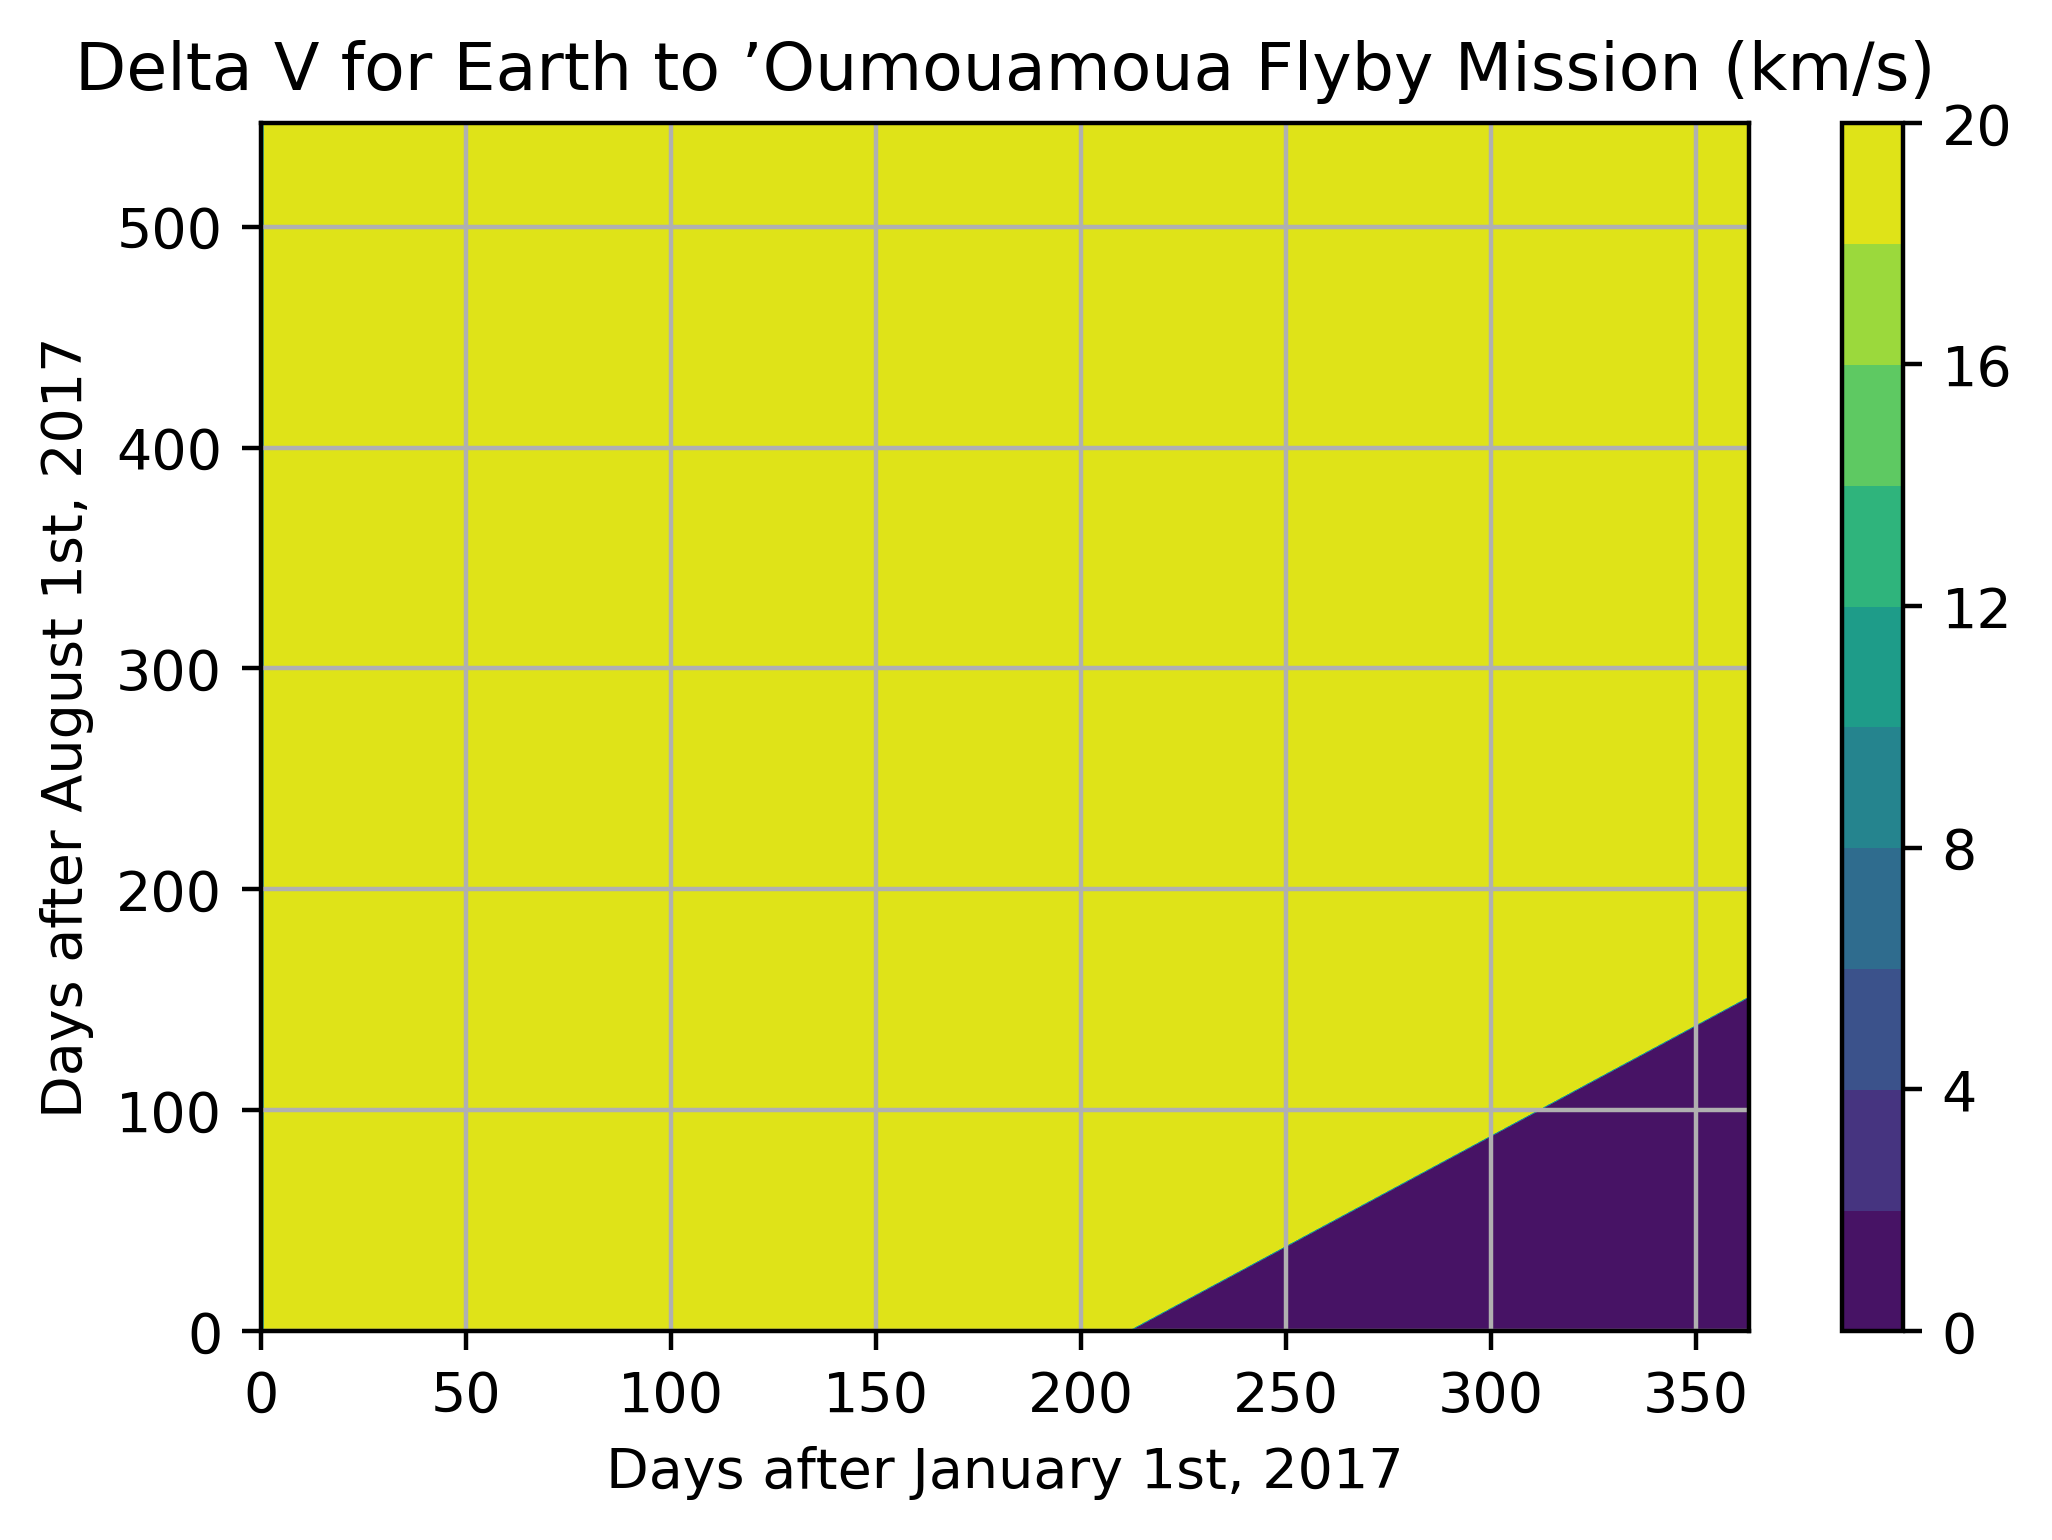

In [12]:
#Contour Plot
levels = np.linspace(0.0, 20, 11);
fig = plt.figure(dpi=400);
dates_plot = plt.contourf(t_departure,t_arrival,dates,levels=levels);
plt.colorbar(dates_plot)
plt.title('Delta V for Earth to ’Oumouamoua Flyby Mission (km/s)')
plt.xlabel('Days after January 1st, 2017')
plt.ylabel('Days after August 1st, 2017')
plt.grid()
plt.show()